In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"
df = pd.read_csv(file_path)

# Distribution

## Determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_15504\44203524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist = False)


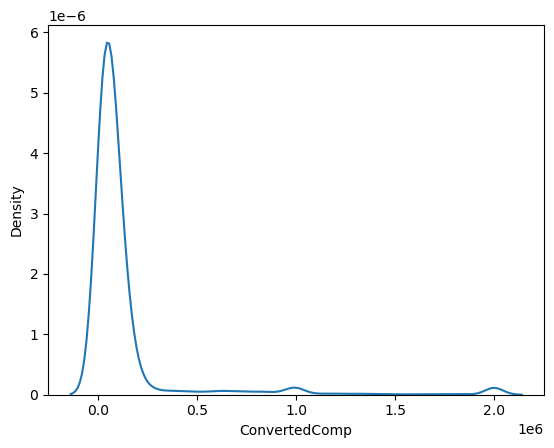

In [4]:
sns.distplot(df['ConvertedComp'], hist = False)
plt.show()

Plot the histogram for the column `ConvertedComp`

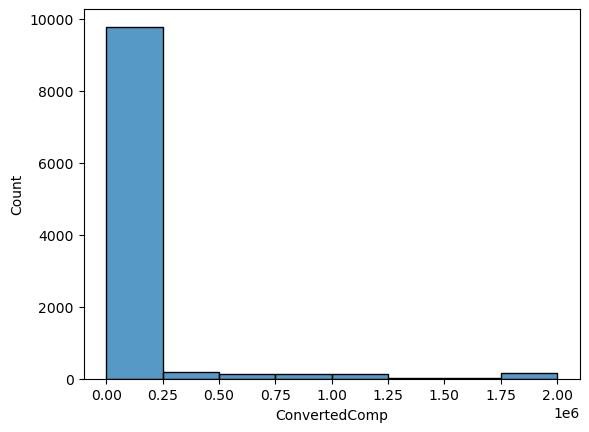

In [5]:
sns.histplot(df['ConvertedComp'], bins=8)
plt.show()

What is the median of the column `ConvertedComp`?

In [6]:
print('The median of the column ConvertedComp is: ', df['ConvertedComp'].median())

The median of the column ConvertedComp is:  57745.0


How many responders identified themselves only as a **Man**?

In [7]:
(df['Gender']=='Man').value_counts()

Gender
True     10480
False      918
Name: count, dtype: int64

What is the median **Age*** of survey respondents?

In [67]:
median_RAge = df[['Respondent', 'Age']]
median_RAge

Respondent   Age
0               4  22.0
1               9  23.0
2              13  28.0
3              16  26.0
4              17  29.0
...           ...   ...
11393       25136  36.0
11394       25137  25.0
11395       25138  34.0
11396       25141  25.0
11397       25142  30.0

[11398 rows x 2 columns]

In [68]:
median_RAge['Age'].median()

29.0

Find out the median ConvertedComp of responders identified themselves only as a `Woman`? 

In [16]:
median_CC_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
median_CC_woman

57708.0

Give the five number summary for the column `Age`?

In [18]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`

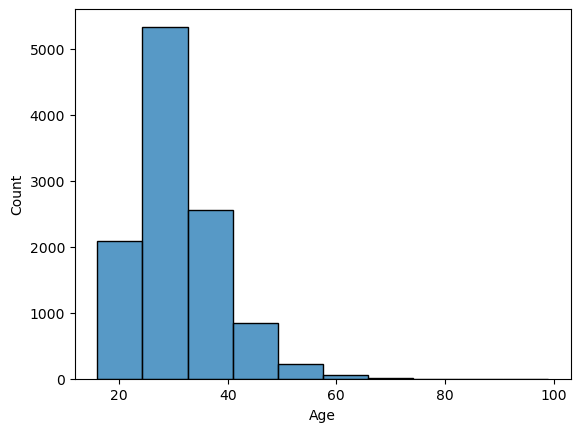

In [31]:
sns.histplot(df['Age'], bins = 10)
plt.show()

# Outliers

## Finding outliers

Find out if outliers exist in the column `ConvertedComp` using a box plot?

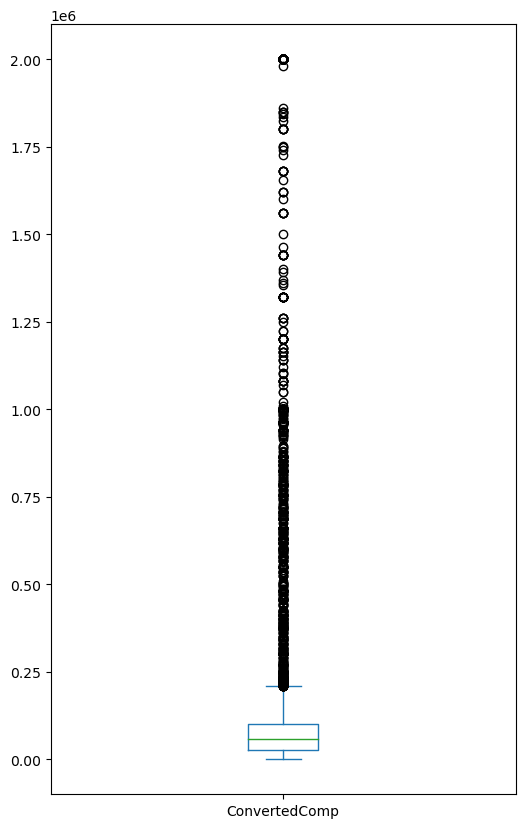

In [36]:
plt.figure(figsize=(6,10))
df['ConvertedComp'].plot(kind = 'box')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`

In [39]:

Q1 = df['ConvertedComp'].quantile(0.25) #25th percentile
Q3 = df['ConvertedComp'].quantile(0.75) #75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print(f"Inter Quartile Range for ConvertedComp: {IQR}")

Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.

In [41]:
Upper_bounds = Q3 + IQR * 1.5
Lower_bounds = Q1 - IQR * 1.5

print(f"Upper bounds:{Upper_bounds}")
print(f"Lower bounds:{Lower_bounds}")

Upper bounds:209698.0
Lower bounds:-82830.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [43]:
outlier_CC = df[df['ConvertedComp'] > 1.5 *( Q3 - Q1) + Q3]

In [49]:
# Create a new DataFrame without outliers
df_cleaned = df[(df['ConvertedComp'] >= Lower_bounds) & (df['ConvertedComp'] <= Upper_bounds)]


What is the median **ConvertedComp** after removing outliers?

In [70]:
print('The median of the column ConvertedComp after removing outliers is: ', df_cleaned['ConvertedComp'].median())

The median of the column ConvertedComp after removing outliers is:  52704.0


What is the mean **ConvertedComp** after removing outliers?

In [72]:
print('Mean of ConvertedComp after removing outliers:',df_cleaned['ConvertedComp'].mean())

Mean of ConvertedComp after removing outliers: 59883.20838915799


In [60]:
df_cleaned.describe()

Respondent     CompTotal  ConvertedComp  WorkWeekHrs   CodeRevHrs  \
count   9703.000000  9.703000e+03    9703.000000  9664.000000  7612.000000   
mean   12501.007317  7.241139e+05   59883.208389    41.864782     4.737455   
std     7235.627217  7.186806e+06   43394.336755    24.613489     4.420472   
min        4.000000  0.000000e+00       0.000000     3.000000     0.000000   
25%     6237.000000  2.000000e+04   24060.000000    40.000000     2.000000   
50%    12571.000000  6.300000e+04   52704.000000    40.000000     4.000000   
75%    18787.500000  1.150000e+05   85574.500000    42.000000     5.000000   
max    25141.000000  3.900000e+08  209356.000000  1012.000000    99.000000   

               Age  
count  9493.000000  
mean     30.695860  
std       7.346625  
min      16.000000  
25%      25.000000  
50%      29.000000  
75%      34.000000  
max      99.000000

# Correlation

## Finding correlation

Find the correlation between `Age` and all other numerical columns.

In [61]:
df_numer = df_cleaned.select_dtypes(include=['number'])

In [64]:
df_numer.corr()

Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.019354       0.010878    -0.016221    0.005293   
CompTotal       -0.019354   1.000000      -0.063561     0.004910    0.017007   
ConvertedComp    0.010878  -0.063561       1.000000     0.034351   -0.088934   
WorkWeekHrs     -0.016221   0.004910       0.034351     1.000000    0.038935   
CodeRevHrs       0.005293   0.017007      -0.088934     0.038935    1.000000   
Age              0.002180   0.006337       0.401821     0.032032   -0.012878   

                    Age  
Respondent     0.002180  
CompTotal      0.006337  
ConvertedComp  0.401821  
WorkWeekHrs    0.032032  
CodeRevHrs    -0.012878  
Age            1.000000